# READ RAW DATA 

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import pylab
import numpy as np
import sklearn
from sklearn import linear_model
import sklearn.preprocessing as preprocessing
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from statsmodels.stats import proportion

import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import balanced_accuracy_score, roc_auc_score,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
from urllib.request import urlretrieve
urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', 'german.data')

('german.data', <http.client.HTTPMessage at 0x7ff17a89d580>)

In [3]:
german_df = pd.read_csv('german.data', 
                        delimiter=' ',header=None)

In [4]:
german_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


## Online description of what everything means & how to recode it

In [5]:
urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc', 'german.doc')
f = open('german.doc')
german_doc= f.read()
print(german_doc)

Description of the German credit dataset.

1. Title: German Credit data

2. Source Information

Professor Dr. Hans Hofmann  
Institut f"ur Statistik und "Okonometrie  
Universit"at Hamburg  
FB Wirtschaftswissenschaften  
Von-Melle-Park 5    
2000 Hamburg 13 

3. Number of Instances:  1000

Two datasets are provided.  the original dataset, in the form provided
by Prof. Hofmann, contains categorical/symbolic attributes and
is in the file "german.data".   
 
For algorithms that need numerical attributes, Strathclyde University 
produced the file "german.data-numeric".  This file has been edited 
and several indicator variables added to make it suitable for 
algorithms which cannot cope with categorical variables.   Several
attributes that are ordered categorical (such as attribute 17) have
been coded as integer.    This was the form used by StatLog.


6. Number of Attributes german: 20 (7 numerical, 13 categorical)
   Number of Attributes german.numer: 24 (24 numerical)


7.  Attribute d

In [6]:
# rename columns 
german_df.columns=['account_bal','duration','payment_status','purpose',
                   'credit_amount','savings_bond_value','employed_since',
                   'intallment_rate','sex_marital','guarantor','residence_since',
                   'most_valuable_asset','age','concurrent_credits','type_of_housing',
                   'number_of_existcr','job','number_of_dependents','telephon',
                   'foreign','target']

In [7]:
# find and replace particular values
german_df= german_df.replace(['A11','A12','A13','A14', 'A171','A172','A173','A174','A121','A122','A123','A124'],
                  ['neg_bal','positive_bal','positive_bal','no_acc','unskilled','unskilled','skilled','highly_skilled',
                   'none','car','life_insurance','real_estate'])

In [8]:
# separate out sex & marital status
german_df["sex"] = german_df["sex_marital"]
german_df["sex"] = german_df["sex"].map({ "A91":"Male", 
                      "A93":"Male",
                      "A94":"Male",
                      "A92":"Female",
                      "A95":"Female"
                     })

In [9]:
german_df.rename(columns={"sex_marital": 'marital', 'oldName2': 'newName2'}, inplace=True)
# german_df["marital"] = german_df["marital"].map({ "A91" : "divorced/separated",
#                                                  "A92" : "divorced/separated/married",
#                                                  "A93" : "single",
#                                                  "A94" : "married/widowed",
#                                                  "A95" : "single"
#                                                 })
german_df["marital"] = german_df["marital"].map({ "A91" : "not_single",
                                                 "A92" : "not_single",
                                                 "A93" : "single",
                                                 "A94" : "not_single",
                                                 "A95" : "single"
                                                })


In [10]:
german_df.head()

,account_bal,duration,payment_status,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,marital,guarantor,...,age,concurrent_credits,type_of_housing,number_of_existcr,job,number_of_dependents,telephon,foreign,target,sex
0,neg_bal,6,A34,A43,1169,A65,A75,4,single,A101,...,67,A143,A152,2,skilled,1,A192,A201,1,Male
1,positive_bal,48,A32,A43,5951,A61,A73,2,not_single,A101,...,22,A143,A152,1,skilled,1,A191,A201,2,Female
2,no_acc,12,A34,A46,2096,A61,A74,2,single,A101,...,49,A143,A152,1,unskilled,2,A191,A201,1,Male
3,neg_bal,42,A32,A42,7882,A61,A74,2,single,A103,...,45,A143,A153,1,skilled,2,A191,A201,1,Male
4,neg_bal,24,A33,A40,4870,A61,A73,3,single,A101,...,53,A143,A153,2,skilled,2,A191,A201,2,Male


In [11]:
# Check for missing values in case
german_df.isna().any().any()

False

In [12]:
te = german_df.columns

## Fix Target columns --> '0': Good Loan & '1': Bad Loan


In [13]:
# The target column has two values:
# 1: represents a good loan
# 2: represents a bad (defaulted) loan.
print(german_df.target.unique())

### FIX THE TARGET COLUMNS ###
# The usual convention is to use '1' for bad loans and '0' for good loans. 

from sklearn.preprocessing import LabelEncoder

labEn= LabelEncoder()
labEn.fit(german_df.target)
german_df.target=labEn.transform(german_df.target)


[1 2]


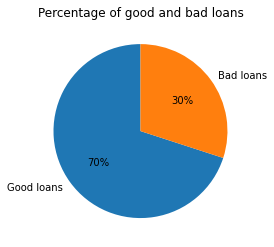

In [14]:
# visualize to see class imbalance
good_bad_per=round(((german_df.target.value_counts()/german_df.target.count())*100))
good_bad_per
plt.pie(good_bad_per,labels=['Good loans', 'Bad loans'], autopct='%1.0f%%', startangle=90)
plt.title('Percentage of good and bad loans');

In [15]:
german_df[['credit_amount','duration','age']].describe()

## credit amount is very large compared to the rest

,credit_amount,duration,age
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,20.903000,35.546000
std,2822.736876,12.058814,11.375469
min,250.000000,4.000000,19.000000
25%,1365.500000,12.000000,27.000000
50%,2319.500000,18.000000,33.000000
75%,3972.250000,24.000000,42.000000
max,18424.000000,72.000000,75.000000


In [16]:
german_df['credit_amount'] = np.log(german_df['credit_amount']) # fix credit_amount
german_df[['credit_amount','duration','age']].describe()

,credit_amount,duration,age
count,1000.000000,1000.000000,1000.000000
mean,7.788691,20.903000,35.546000
std,0.776474,12.058814,11.375469
min,5.521461,4.000000,19.000000
25%,7.219276,12.000000,27.000000
50%,7.749107,18.000000,33.000000
75%,8.287088,24.000000,42.000000
max,9.821409,72.000000,75.000000


## encode categorical variables

In [17]:
# Number of unique classes in each object column
german_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

account_bal             3
payment_status          5
purpose                10
savings_bond_value      5
employed_since          5
marital                 2
guarantor               3
most_valuable_asset     4
concurrent_credits      3
type_of_housing         3
job                     3
telephon                2
foreign                 2
sex                     2
dtype: int64

### Implementation: <br>
- 2 catergories  label encoding
- greater that 2 categories One Hot

    

In [18]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in german_df:
    if german_df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(german_df[col].unique())) <= 2:
            # Train on the training data
            le.fit(german_df[col])
            # Transform both training and testing data
            german_df[col] = le.transform(german_df[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [19]:
# le.inverse_transform(german_df["sex"])

In [20]:
# german_df["sex"]

In [21]:
german_df = pd.get_dummies(german_df)

print('Encoded Features shape: ', german_df.shape)

Encoded Features shape:  (1000, 56)


## Prepare Train-Test

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x, y = german_df.drop('target', axis=1), german_df['target']
x.shape, y.shape

((1000, 55), (1000,))

In [24]:
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=.2, random_state=42)

In [25]:
## extract sensitive features
A = X_test["sex"].map({1:"Male",0:"Female"})
A_str_test = X_test["sex"]
A_ = X_train["sex"].map({1:"Male",0:"Female"})
A_str_train = X_train["sex"]

In [26]:
import scipy.stats as ss

In [27]:
## FAIRNESS

## use fair learn

#####################################################################
# DP: Demographic Parity
# EO: equalized odds --> Equal Opportunity is a relaxed version of it
# False Positive 
# True Positive 
# Error Rate Parity 
#####################################################################



# USING FAIRLEARN

In [28]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

# Data processing
from sklearn.model_selection import train_test_split

# Fairlearn algorithms and utils
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.reductions import GridSearch, EqualizedOdds

# Metrics
from fairlearn.metrics import (
    MetricFrame,
    selection_rate, demographic_parity_difference, demographic_parity_ratio,
    false_positive_rate, false_negative_rate,
    false_positive_rate_difference, false_negative_rate_difference,
    equalized_odds_difference, count)

from sklearn.metrics import balanced_accuracy_score, roc_auc_score,accuracy_score

# USE LIGHTGBM

### gradient boosting framework -- tree based learning 

"While other algorithms trees grow horizontally, LightGBM algorithm grows vertically meaning it grows leaf-wise and other algorithms grow level-wise. LightGBM chooses the leaf with large loss to grow. It can lower down more loss than a level wise algorithm when growing the same leaf.

LightGBM is called “Light” because of its computation power and giving results faster. It takes less memory to run and is able to deal with large amounts of data.
"
https://www.analyticssteps.com/blogs/what-light-gbm-algorithm-how-use-it



In [29]:
# Models
import lightgbm as lgb
from sklearn.calibration import CalibratedClassifierCV

lgb_params = {
    'objective' : 'binary',
    'metric' : 'cross_entropy', 
    'learning_rate': 0.1,
    'num_leaves' : 10,
    'max_depth' : 3
}

model = lgb.LGBMClassifier(**lgb_params)

In [30]:
train_data = X_train
train_labels = y_train
test_data = X_test
test_labels = y_test
model.fit(train_data, train_labels)

LGBMClassifier(max_depth=3, metric='auc', num_leaves=10, objective='binary')

In [31]:
# Scores on test set
test_scores = model.predict_proba(test_data)[:, 1]
test_pred = model.predict(test_data)

In [32]:
# Train AUC
roc_auc_score(train_labels, model.predict_proba(train_data)[:, 1])

0.9446774397078364

In [33]:
# ACCURACY
accuracy_score(test_labels, test_pred)

0.805

In [34]:
# Predictions (0 or 1) on test set
test_preds = (test_scores >= np.mean(train_labels)) * 1


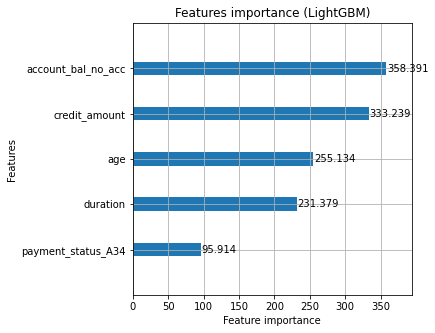

In [35]:
# LightGBM feature importance 
lgb.plot_importance(model, figsize = (5,5), height=0.3, title="Features importance (LightGBM)", importance_type="gain", max_num_features=5) 
plt.show()


In [36]:
# USE FAIRLEARN now
# use MetricFrame for analysis 
##     selection_rate, demographic_parity_difference, demographic_parity_ratio,
##    false_positive_rate, false_negative_rate,
##    false_positive_rate_difference, false_negative_rate_difference,
##    equalized_odds_difference, count



mf = MetricFrame({
    'FPR': false_positive_rate,
    'FNR': false_negative_rate},
    test_labels, test_preds, sensitive_features=A_str_test)

mf.by_group

,FPR,FNR
sex,,
0,0.25641,0.352941
1,0.254902,0.238095


In [37]:
# Helper functions
def get_metrics_df(models_dict, y_true, group):
    metrics_dict = {
#         "Overall selection rate": (
#             lambda x: selection_rate(y_true, x), True),
        "Demographic parity difference": (
            lambda x: demographic_parity_difference(y_true, x, sensitive_features=group), True),
#         "Demographic parity ratio": (
#             lambda x: demographic_parity_ratio(y_true, x, sensitive_features=group), True),
#         "------": (lambda x: "", True),
#         "Overall balanced error rate": (
#             lambda x: 1-balanced_accuracy_score(y_true, x), True),
#         "Balanced error rate difference": (
#             lambda x: MetricFrame(metrics=balanced_accuracy_score, y_true=y_true, y_pred=x, sensitive_features=group).difference(method='between_groups'), True),
#         " ------": (lambda x: "", True),
#         "False positive rate difference": (
#             lambda x: false_positive_rate_difference(y_true, x, sensitive_features=group), True),
#         "False negative rate difference": (
#             lambda x: false_negative_rate_difference(y_true, x, sensitive_features=group), True),
        "Equalized odds difference": (
            lambda x: equalized_odds_difference(y_true, x, sensitive_features=group), True),
        "  ------": (lambda x: "", True),
        "Accuracy": (
             lambda x: accuracy_score(y_true, x), True),
#         "Overall AUC": (
#             lambda x: roc_auc_score(y_true, x), False),
#         "AUC difference": (
#             lambda x: MetricFrame(metrics=roc_auc_score, y_true=y_true, y_pred=x, sensitive_features=group).difference(method='between_groups'), False),
    }
    df_dict = {}
    for metric_name, (metric_func, use_preds) in metrics_dict.items():
        df_dict[metric_name] = [metric_func(preds) if use_preds else metric_func(scores) 
                                for model_name, (preds, scores) in models_dict.items()]
    return pd.DataFrame.from_dict(df_dict, orient="index", columns=models_dict.keys())

In [38]:
models_dict = {"Unmitigated": (test_preds, test_scores)}
get_metrics_df(models_dict, test_labels, A_str_test)

,Unmitigated
Demographic parity difference,0.0277778
Equalized odds difference,0.114846
------,
Accuracy,0.74


## MITIGATION

In [39]:
# from fairlearn.reductions import EqualizedOdds, TruePositiveRateParity,ErrorRateParity,DemographicParity
# dp = DemographicParity(difference_bound=0.01)
# tprp = TruePositiveRateParity(difference_bound=0.01)
# eo = EqualizedOdds(difference_bound=0.01)
# erp = ErrorRateParity(difference_bound=0.01)
# # demographic parity
# dp.load_data(test_data, test_labels, sensitive_features=A_str_test)
# print("------------------------------------------")
# print("           Demographic Parity")
# print(dp.gamma(lambda X: test_preds))

# # Equalized Odds
# eo.load_data(test_data, test_labels, sensitive_features=A_str_test)
# print("------------------------------------------")
# print("           Equalized Odds")
# print(eo.gamma(lambda X: test_preds))

# # ErrorRateParity
# erp.load_data(test_data, test_labels, sensitive_features=A_str_test)
# print("------------------------------------------")
# print("           Error Rate Parity")
# print(erp.gamma(lambda X: test_preds))



## Threshold Optimizer w Demographic Parity 

In [40]:
import pprint

postprocess_est = ThresholdOptimizer(
    estimator = model,
    constraints="demographic_parity",
    prefit=True)

balanced_idx1 = train_data[train_labels==1].index
pp_train_idx = balanced_idx1.union(train_labels[train_labels==0].sample(n=balanced_idx1.size, random_state=1234).index)
df_train_balanced = train_data.loc[pp_train_idx, :]
Y_train_balanced = train_labels.loc[pp_train_idx]
A_train_balanced = A_.loc[pp_train_idx]


postprocess_est.fit(df_train_balanced, Y_train_balanced, sensitive_features=A_train_balanced)

postprocess_preds = postprocess_est.predict(test_data, sensitive_features= A)


models_dict = {"Unmitigated": (test_preds, test_scores),
              "ThresholdOptimizer": (postprocess_preds, postprocess_preds)}
(get_metrics_df(models_dict, test_labels, A_str_test))

,Unmitigated,ThresholdOptimizer
Demographic parity difference,0.0277778,0.0436508
Equalized odds difference,0.114846,0.0770308
------,,
Accuracy,0.74,0.805


In [41]:
# blah = (get_metrics_df(models_dict, test_labels, A_str_test))
# blah.to_csv('/Users/abhishek/Desktop/ADULT_CSV/DP/all_feat.csv', 
#             index=True,
#             header = ['Unmit:all feat(DP)','ThrOpt:all feat(DP)'])

## Threshold Optimizer w Equalized Odds

In [42]:
import pprint

postprocess_est = ThresholdOptimizer(
    estimator = model,
    constraints="equalized_odds",
    prefit=True)

balanced_idx1 = train_data[train_labels==1].index
pp_train_idx = balanced_idx1.union(train_labels[train_labels==0].sample(n=balanced_idx1.size, random_state=1234).index)
df_train_balanced = train_data.loc[pp_train_idx, :]
Y_train_balanced = train_labels.loc[pp_train_idx]
A_train_balanced = A_.loc[pp_train_idx]


postprocess_est.fit(df_train_balanced, Y_train_balanced, sensitive_features=A_train_balanced)

postprocess_preds = postprocess_est.predict(test_data, sensitive_features= A)


models_dict = {"Unmitigated": (test_preds, test_scores),
              "ThresholdOptimizer": (postprocess_preds, postprocess_preds)}
(get_metrics_df(models_dict, test_labels, A_str_test))

,Unmitigated,ThresholdOptimizer
Demographic parity difference,0.0277778,0.0615079
Equalized odds difference,0.114846,0.135854
------,,
Accuracy,0.74,0.8


## Exponentiated Gradient w Demographic Parity

In [43]:
from fairlearn.reductions import ExponentiatedGradient,EqualizedOdds,DemographicParity
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
xgc = XGBClassifier(verbosity=0)

eg = ExponentiatedGradient(estimator= model, constraints= DemographicParity(),max_iter=2)
eg.fit(train_data,train_labels, sensitive_features=A_)
eg_test_preds = eg.predict(test_data)

models_dict = {"Unmitigated": (test_preds, test_scores),
              "ExponentiatedGrad": (eg_test_preds,eg_test_preds)}
(get_metrics_df(models_dict, test_labels, A_str_test))

,Unmitigated,ExponentiatedGrad
Demographic parity difference,0.0277778,0.0545635
Equalized odds difference,0.114846,0.112045
------,,
Accuracy,0.74,0.795


## Exponentiated Gradient w equalized odds

In [44]:
from fairlearn.reductions import ExponentiatedGradient,EqualizedOdds,DemographicParity
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
xgc = XGBClassifier(verbosity=0)

eg = ExponentiatedGradient(estimator= model, constraints= EqualizedOdds(),max_iter=2)
eg.fit(train_data,train_labels, sensitive_features=A_)
eg_test_preds = eg.predict(test_data)

models_dict = {"Unmitigated": (test_preds, test_scores),
              "ExponentiatedGrad": (eg_test_preds,eg_test_preds)}
(get_metrics_df(models_dict, test_labels, A_str_test))

,Unmitigated,ExponentiatedGrad
Demographic parity difference,0.0277778,0.0436508
Equalized odds difference,0.114846,0.0770308
------,,
Accuracy,0.74,0.805


## Useful functions

In [45]:
def score_range(p, q, df):
    """Returns number of success and observations for given bucket."""
    gp = df[df['score'] > p]
    lq = gp[gp['score'] <= q]
    return [sum(lq['target']), len(lq['target'])]

def get_frequencies(marginals, num_buckets=10):
    """Returns list of lists. The first list is successes 
    for all buckets, the second one is total counts."""
    ts = np.linspace(0, 1, num_buckets+1)
    frequencies = [[],[]]
    for i in range(num_buckets):
        b = score_range(ts[i], ts[i+1], marginals)
        frequencies[0].append(b[0])
        frequencies[1].append(b[1])
    return frequencies

def plot_confidence(plt, xs, n_succs, n_obss, label, linestyle, color, confidence=0.95):
    """Plot a graph with confidence intervals where
       each x corresponds to a binomial random variable in which n_obs observations led to n_succ successes"""
    n_succs, n_obss = np.array(n_succs), np.array(n_obss)
    conf_lbs, conf_ubs = proportion.proportion_confint(n_succs, n_obss, alpha=1-confidence)
    pylab.fill_between(xs, conf_ubs, conf_lbs, alpha=.2, color=color)
    pylab.plot(xs, n_succs / n_obss, '.-', label=label, linestyle=linestyle, color=color)

In [46]:
import pprint as pp
pp.pprint(te)

Index(['account_bal', 'duration', 'payment_status', 'purpose', 'credit_amount',
       'savings_bond_value', 'employed_since', 'intallment_rate', 'marital',
       'guarantor', 'residence_since', 'most_valuable_asset', 'age',
       'concurrent_credits', 'type_of_housing', 'number_of_existcr', 'job',
       'number_of_dependents', 'telephon', 'foreign', 'target', 'sex'],
      dtype='object')
